In [90]:
import numpy as np
import pickle 
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150

In [3]:
results = dict()
for filename in glob.glob('*.pickle'):
    results[filename] = pickle.load(open(filename, "rb"))


In [24]:
df = pd.DataFrame(results['trainHistoryDict_100_area.pickle'])

In [28]:
new_df = df.stack()

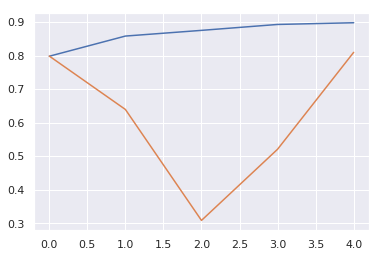

In [33]:
plt.plot(results['trainHistoryDict_100_area.pickle']['recall_m'])
plt.plot(results['trainHistoryDict_100_area.pickle']['val_recall_m'])

In [58]:
import re
w = re.split('[_.]',key)

In [71]:
res = pd.DataFrame()
for key, value in results.items():
    w = re.split('[_.]', key)
    img_size = w[1]
    interp_method = w[2]
    for _key, _value in value.items():
        _w = re.split('_', _key)
        if _w[0] != 'val': datatype = 'train'
        else: datatype='val'
        count=1
        for i in _value:
            res = res.append({'epoch': int(count), 'value': i, 'metric': _key, 'data':datatype, 'imgsize':img_size, \
                             'interp_method': interp_method}, ignore_index=True)
            count = count+1

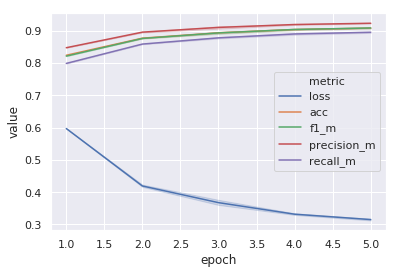

In [76]:
res_train = res[res['data'] == 'train']
sns.lineplot(x='epoch', y='value', hue='metric', data=res_train)

In [78]:
res_test

,data,epoch,imgsize,interp_method,metric,value
25,val,1.0,100,bilinear,val_loss,0.795809
26,val,2.0,100,bilinear,val_loss,1.674585
27,val,3.0,100,bilinear,val_loss,0.653008
28,val,4.0,100,bilinear,val_loss,1.172089
29,val,5.0,100,bilinear,val_loss,0.479383
...,...,...,...,...,...,...
195,val,1.0,100,nearest,val_recall_m,0.779110
196,val,2.0,100,nearest,val_recall_m,0.828482
197,val,3.0,100,nearest,val_recall_m,0.779395
198,val,4.0,100,nearest,val_recall_m,0.809075


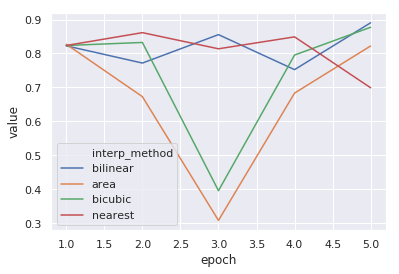

In [81]:
res_test = res[res['data'] == 'val']
res_test = res_test[res_test['metric'] == 'val_precision_m']
sns.lineplot(x='epoch', y='value', hue='interp_method', data=res_test)

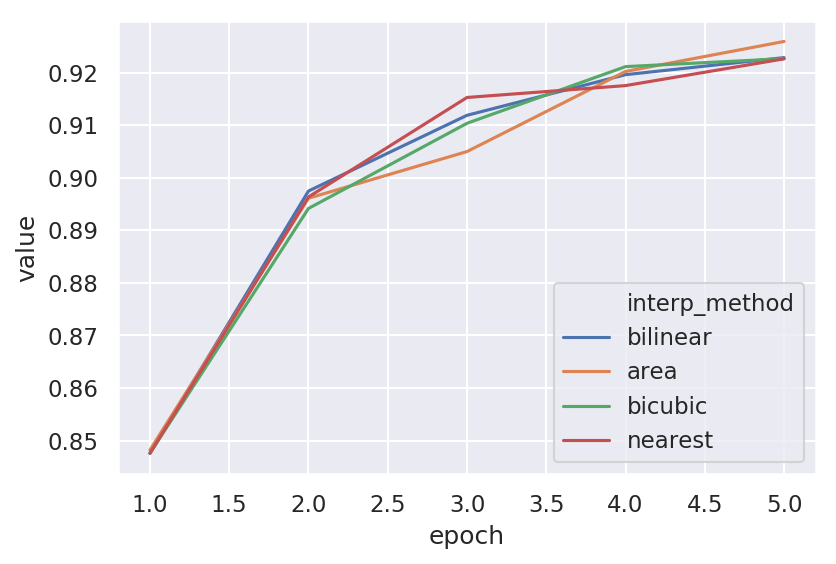

In [91]:
res_test = res[res['data'] == 'train']
res_test = res_test[res_test['metric'] == 'precision_m']
sns.lineplot(x='epoch', y='value', hue='interp_method', data=res_test)

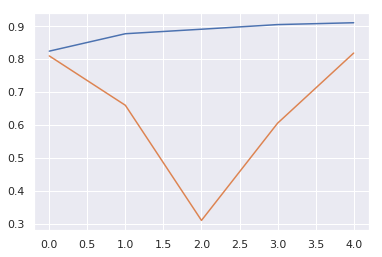

In [34]:
plt.plot(results['trainHistoryDict_100_area.pickle']['acc'])
plt.plot(results['trainHistoryDict_100_area.pickle']['val_acc'])

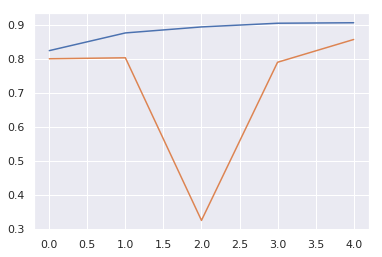

In [35]:
plt.plot(results['trainHistoryDict_100_bicubic.pickle']['acc'])
plt.plot(results['trainHistoryDict_100_bicubic.pickle']['val_acc'])

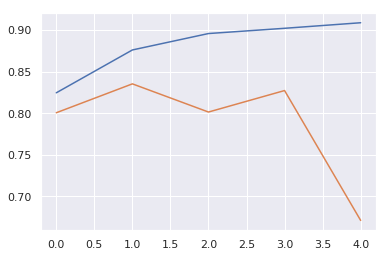

In [36]:
plt.plot(results['trainHistoryDict_100_nearest.pickle']['acc'])
plt.plot(results['trainHistoryDict_100_nearest.pickle']['val_acc'])

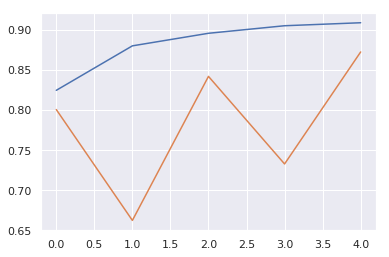

In [37]:
plt.plot(results['trainHistoryDict_100_bilinear.pickle']['acc'])
plt.plot(results['trainHistoryDict_100_bilinear.pickle']['val_acc'])